# Question 1

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans

In [5]:
df1 = pd.read_csv("./HW3_1_data.csv")

In [6]:
df1.head()

x1     x2
0  15.55  28.65
1  14.90  27.55
2  14.45  28.35
3  14.15  28.80
4  13.75  28.05

In [7]:
df1.dropna(inplace=True)

In [8]:
X1 = df1.iloc[:,0].values.reshape(-1,1)
y1 = df1.iloc[:,-1].values.reshape(-1,1)

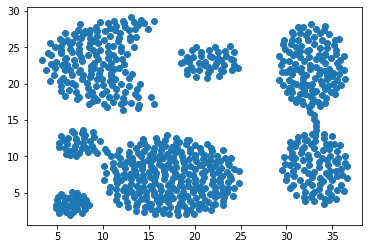

In [9]:
plt.scatter(X1,y1)


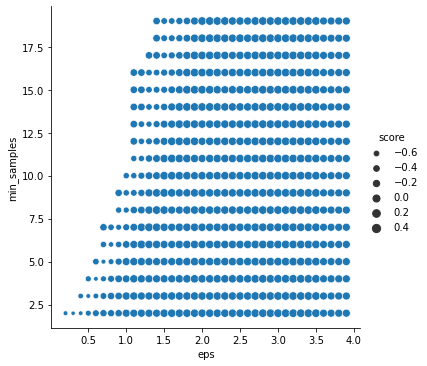

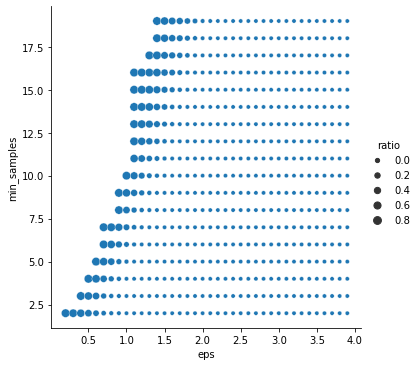

In [10]:
from sklearn import metrics
import seaborn as sns
rs= []
eps = np.arange(0.1,4,0.1)
min_samples=np.arange(2,20,1)

best_score=0
best_score_eps=0
best_score_min_samples=0

for i in eps:
    for j in min_samples:
        try:
            db = DBSCAN(eps=i, min_samples=j,n_jobs=4).fit(df1)
            labels= db.labels_
            k=metrics.silhouette_score(df1,labels)
            ratio = len(labels[labels[:] == -1]) / len(labels) #计算噪声点个数占总数的比例
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 获取分簇的数目
            rs.append([i,j,k,ratio,n_clusters_])

            if k>best_score:
                best_score=k
                best_score_eps=i
                best_score_min_samples=j
            else:
                db=''
        except:
            db=''
rs= pd.DataFrame(rs)
rs.columns=['eps','min_samples','score','ratio','n_clusters']
sns.relplot(x="eps",y="min_samples", size='score',data=rs)
sns.relplot(x="eps",y="min_samples", size='ratio',data=rs)

In [11]:
dbscan1 = DBSCAN(eps=1.3,min_samples=7)

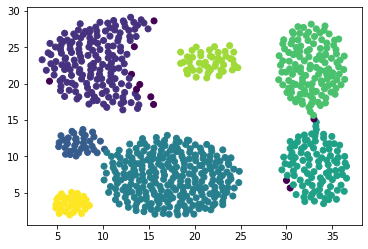

In [12]:
y_pred1 = dbscan1.fit_predict(df1)
plt.scatter(X1,y1,c=y_pred1)
plt.show()

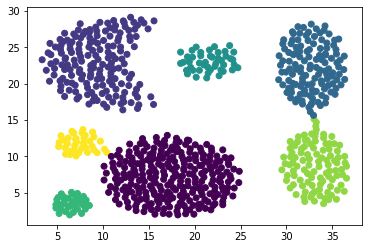

In [13]:
from sklearn.cluster import SpectralClustering
y_p = SpectralClustering(n_clusters=7).fit_predict(df1)
plt.scatter(X1,y1,c=y_p)
plt.show()

# Question 2

In [14]:
df2 = pd.read_csv("./HW3_2_data.csv",index_col='CUST_ID')
df2.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000               NaN          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [15]:
df2.dropna(inplace=True)

In [16]:
data_zs = 1.0*(df2 - df2.mean())/df2.std()

data_zs.replace(np.inf, 1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
C10001  -0.744582          -0.370025  -0.429159         -0.359139   
C10002   0.764108           0.067675  -0.473181         -0.359139   
C10003   0.426578           0.505375  -0.116406          0.099904   
C10005  -0.373889           0.505375  -0.465798         -0.349640   
C10006   0.099545           0.505375   0.142054         -0.359139   
...           ...                ...        ...               ...   
C19184  -0.761297          -1.901979  -0.463537         -0.346731   
C19186  -0.750502           0.505375  -0.338845         -0.359139   
C19188  -0.752934          -0.297078  -0.406548         -0.359139   
C19189  -0.757678          -0.297078  -0.473181         -0.359139   
C19190  -0.586244          -1.099526   0.031293          0.289940   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                -0.354805     -0.468628            -0.820721   
C10002                -0.458812      2.568408            -1.236067   
C10003                -0.458812     -0.468628             1.256004   
C10005                -0.458812     -0.468628            -1.028396   
C10006                 0.994757     -0.468628             0.425314   
...                         ...           ...                  ...   
C19184                -0.458812     -0.468628            -0.820721   
C19186                -0.141427     -0.468628             1.256004   
C19188                -0.301385     -0.468628             0.840658   
C19189                -0.458812     -0.451396            -1.236067   
C19190                -0.458812     -0.408745             0.425314   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                    -0.686240                         -0.717137   
C10002                    -0.686240                         -0.926468   
C10003                     2.646498                         -0.926468   
C10005                    -0.408513                         -0.926468   
C10006                    -0.686240                          0.538851   
...                             ...                               ...   
C19184                    -0.130782                         -0.926468   
C19186                    -0.686240                          1.166845   
C19188                    -0.686240                          0.748184   
C19189                    -0.686240                         -0.926468   
C19190                     1.535586                         -0.926468   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                -0.681913         -0.479409      -0.517593   
C10002                 0.556990          0.099252      -0.597020   
C10003                -0.681913         -0.479409      -0.120460   
C10005                -0.681913         -0.479409      -0.557306   
C10006                -0.681913         -0.479409      -0.279313   
...                         ...               ...            ...   
C19184                -0.681913         -0.479409      -0.557306   
C19186                -0.681913         -0.479409      -0.358740   
C19188                -0.681913         -0.479409      -0.398453   
C19189                 0.144024         -0.190078      -0.597020   
C19190                 0.969956         -0.190078       0.316387   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
CUST_ID                                                                        
C10001      -0.962520 -0.543910         -0.305490         -0.537696  0.355160  
C10002       0.677165  0.796806          0.087684          0.212368  0.355160  
C10003       0.813805 -0.399480         -0.099

In [17]:
model = DBSCAN().fit(data_zs)
r = pd.concat([data_zs,pd.Series(model.labels_,index=df2.index)],axis=1)
r.columns = list(df2.columns) + [u'classification']
r.drop(r[r['classification']==-1].index,inplace=True)


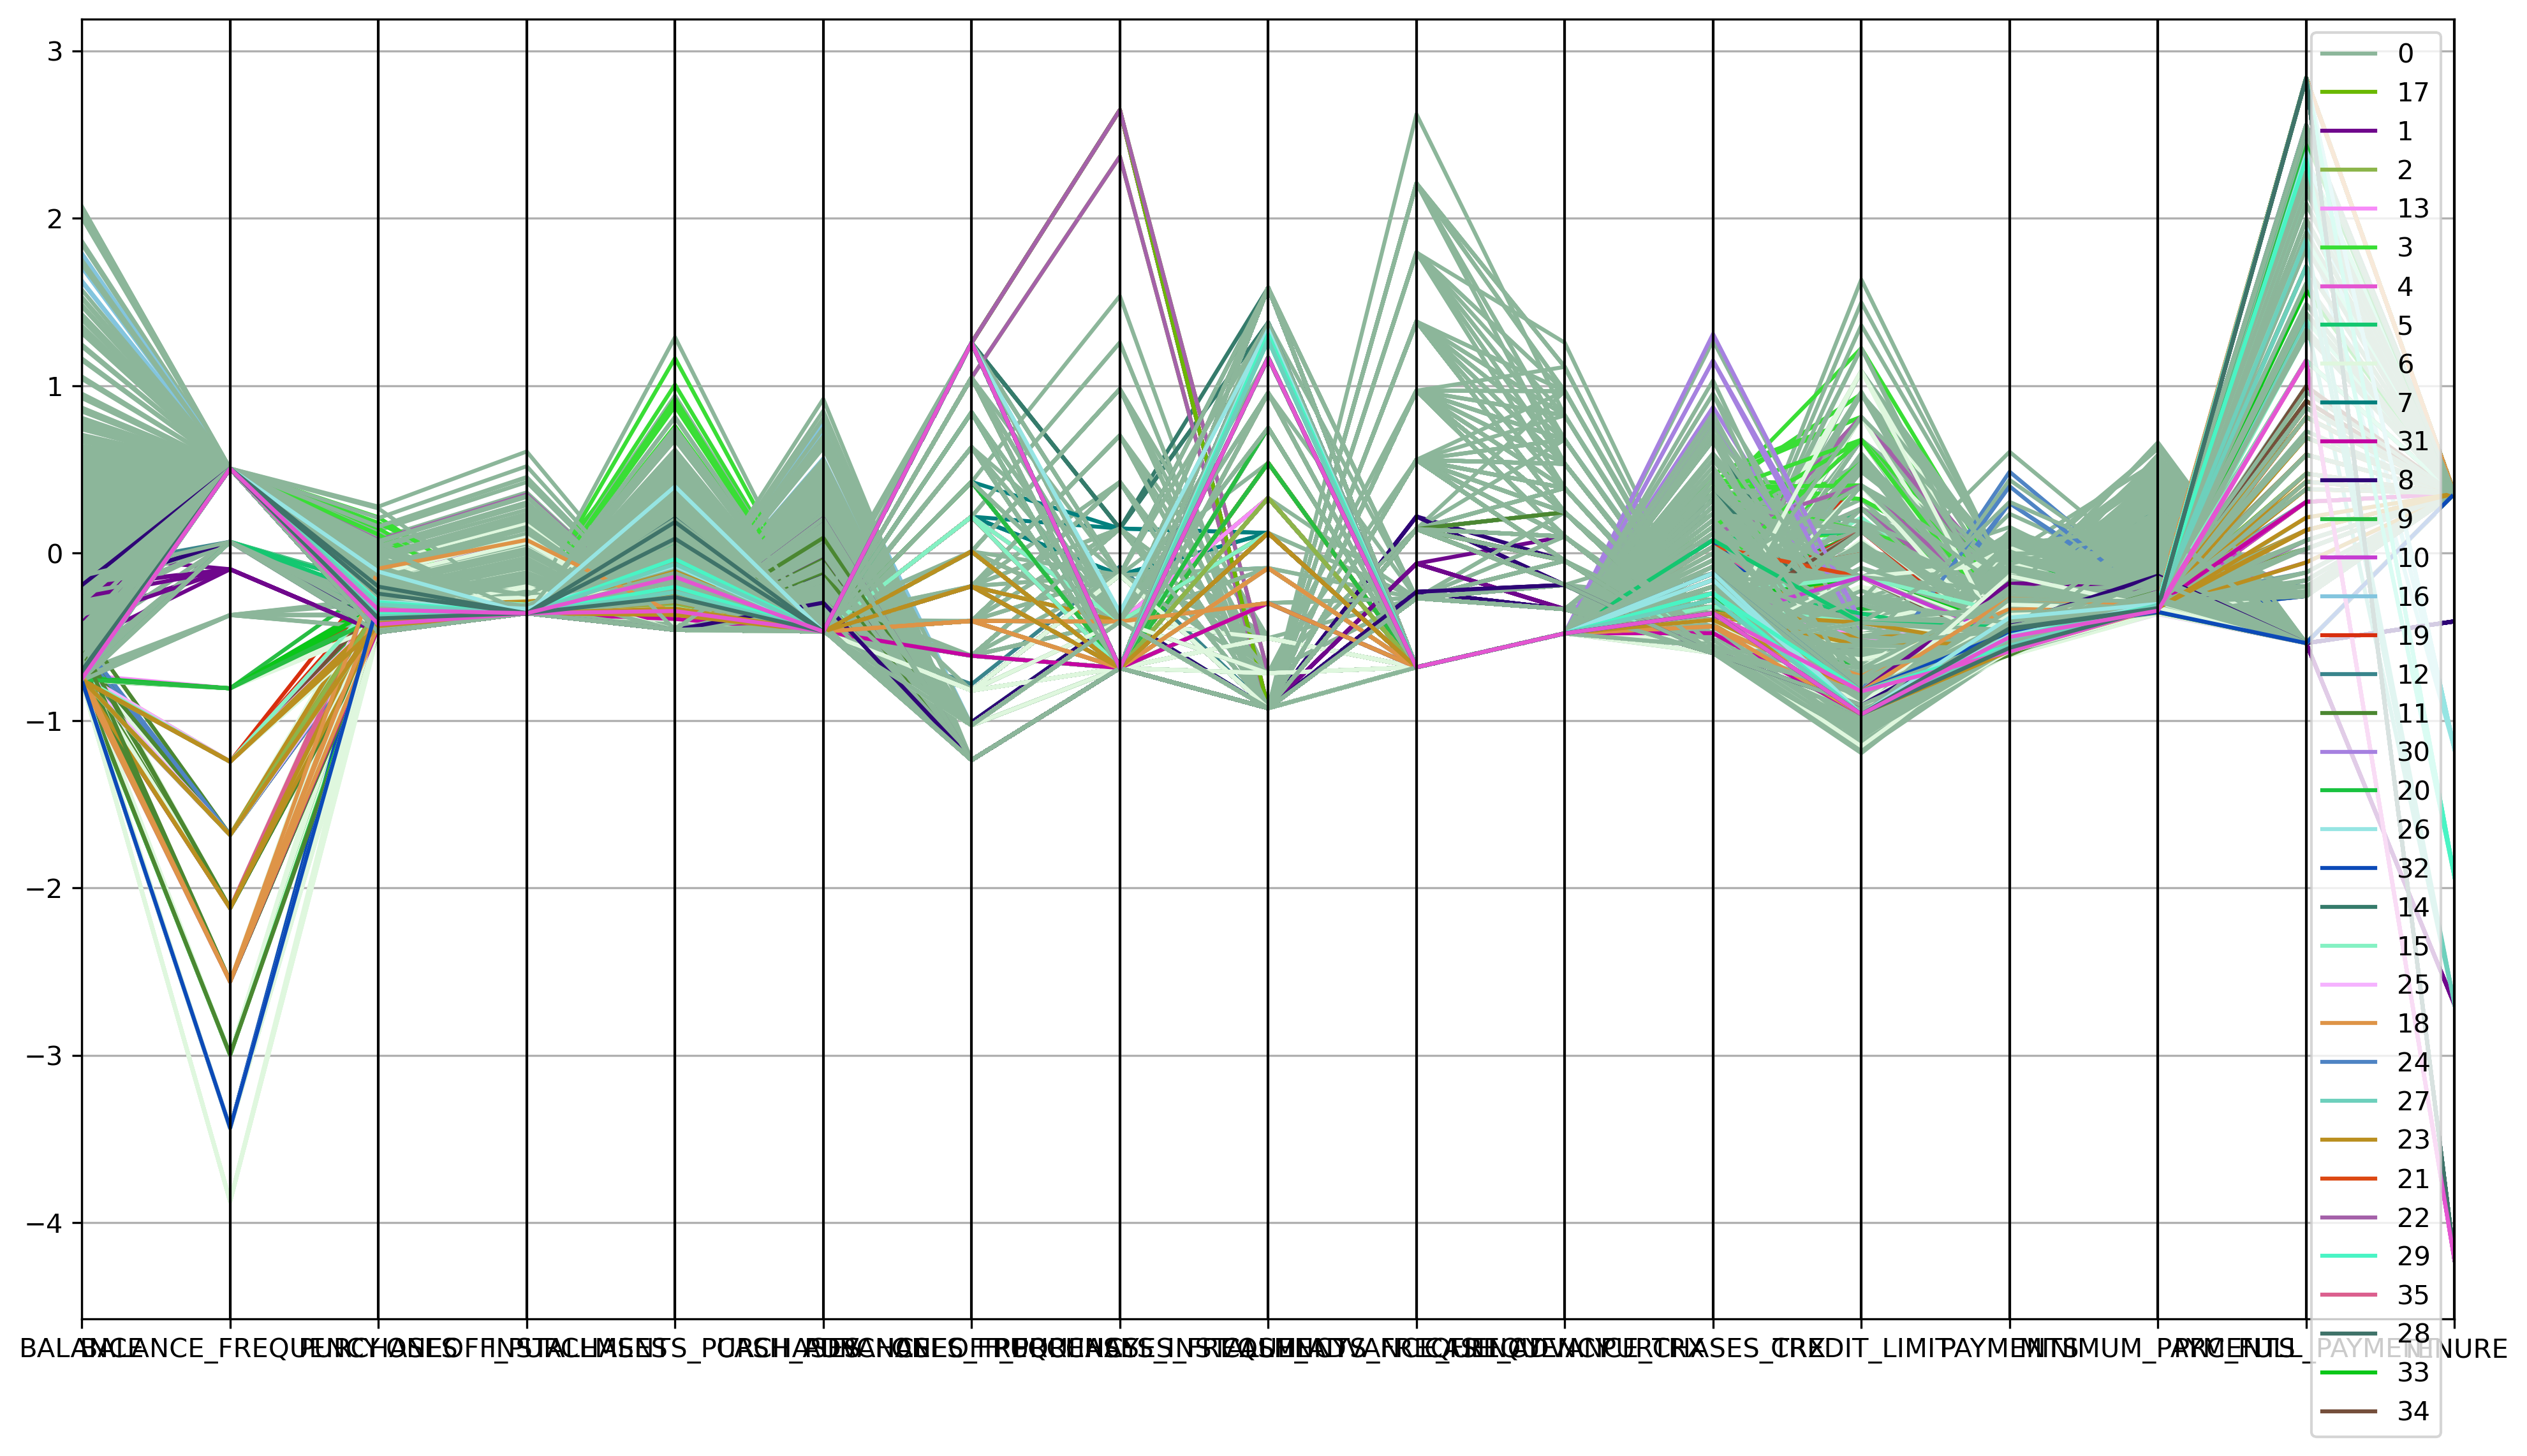

In [18]:
plt.figure(figsize=(16,9),dpi=300)
pd.plotting.parallel_coordinates(r,'classification')
plt.show()

In [19]:
df3 = pd.read_csv("./HW3_2_data.csv")
df3.drop(['CUST_ID','MINIMUM_PAYMENTS'],axis='columns',inplace=True)
df3.dropna(axis='rows',inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mc = MinMaxScaler()
df_mc = mc.fit_transform(df3)

In [21]:
pca = PCA(n_components=11)
df_mc_pca = pca.fit_transform(df_mc)

In [22]:
model1 = KMeans(n_clusters=3,init='k-means++',random_state=123,n_jobs=-1)
model1.fit(df_mc_pca)

C:\ProgramData\Anaconda3\envs\data_mining\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1, random_state=123)

In [23]:
df3['cluster'] = model1.labels_.astype(object)

In [24]:
import plotly.express as px

In [25]:
fig = px.scatter(df3,x='ONEOFF_PURCHASES',y="PURCHASES",color="cluster")
fig.show()
